In [12]:
import pandas as pd

In [13]:
import numpy as np

In [14]:
url="https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2" \
    "Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,170,174,237,273,281,299,349,367,423,444
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,223,243,259,277,304,333,361,377,383,400
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,584,716,847,986,1171,1251,1320,1423,1468,1572
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,370,376,390,428,439,466,501,525,545,564
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,7,8,8,8,10,14,16,17,19


In [15]:
countries = {"Russia", "Italy", "Japan", "Spain", "Germany", "Korea, South", "Brazil", "Iran", "US", "Singapore"}

In [16]:
df[df["Country/Region"].isin(countries)]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
28,NaN,Brazil,-14.2350,-51.9253,0,0,0,0,0,0,...,4579,5717,6836,8044,9056,10360,11130,12161,14034,16170
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,66885,71808,77872,84794,91159,96092,100123,103374,107663,113296
133,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,41495,44605,47593,50468,53183,55743,58226,60500,62589,64586
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,101739,105792,110574,115242,119827,124632,128948,132547,135586,139422
139,NaN,Japan,36.0000,138.0000,2,2,2,2,4,4,...,1866,1953,2178,2495,2617,3139,3139,3654,3906,4257
143,NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,...,9661,9786,9887,9976,10062,10156,10237,10284,10331,10384
187,NaN,Russia,60.0000,90.0000,0,0,0,0,0,0,...,1836,2337,2777,3548,4149,4731,5389,6343,7497,8672
196,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,879,926,1000,1049,1114,1189,1309,1375,1481,1623
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,87956,95923,104118,112065,119199,126168,131646,136675,141942,148220
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,161831,188172,213372,243762,275586,308853,337072,366667,396223,429052


In [17]:
confirmed = dict()
for country in countries:
    cdf = df[(df["Country/Region"]==country) & (df["Province/State"].isnull())][df.columns[4:-1]].T
    if len(cdf.columns) > 0:
        confirmed[country] = np.array(cdf[cdf.columns[0]])

In [18]:
cdf = df[(df["Province/State"]=="Hubei")][df.columns[4:-1]].T
confirmed["Hubei"] = np.array(cdf[cdf.columns[0]])

In [19]:
import matplotlib.pyplot as plt

In [20]:
def exp_smoothing(lst, alpha=0.1):
    tmp_ = lst[0]
    result = [tmp_]
    for x in lst[1:]:
        tmp_ =  x * (1 - alpha) + alpha * tmp_
        result.append(tmp_)
    return result

In [21]:
def division_smoothed(lst):
    result = []
    for prev, cur in zip(lst[:-1], lst[1:]):
        if prev < 1.0:
            result.append(1.0)
        else:
            result.append(cur / prev)
    return result

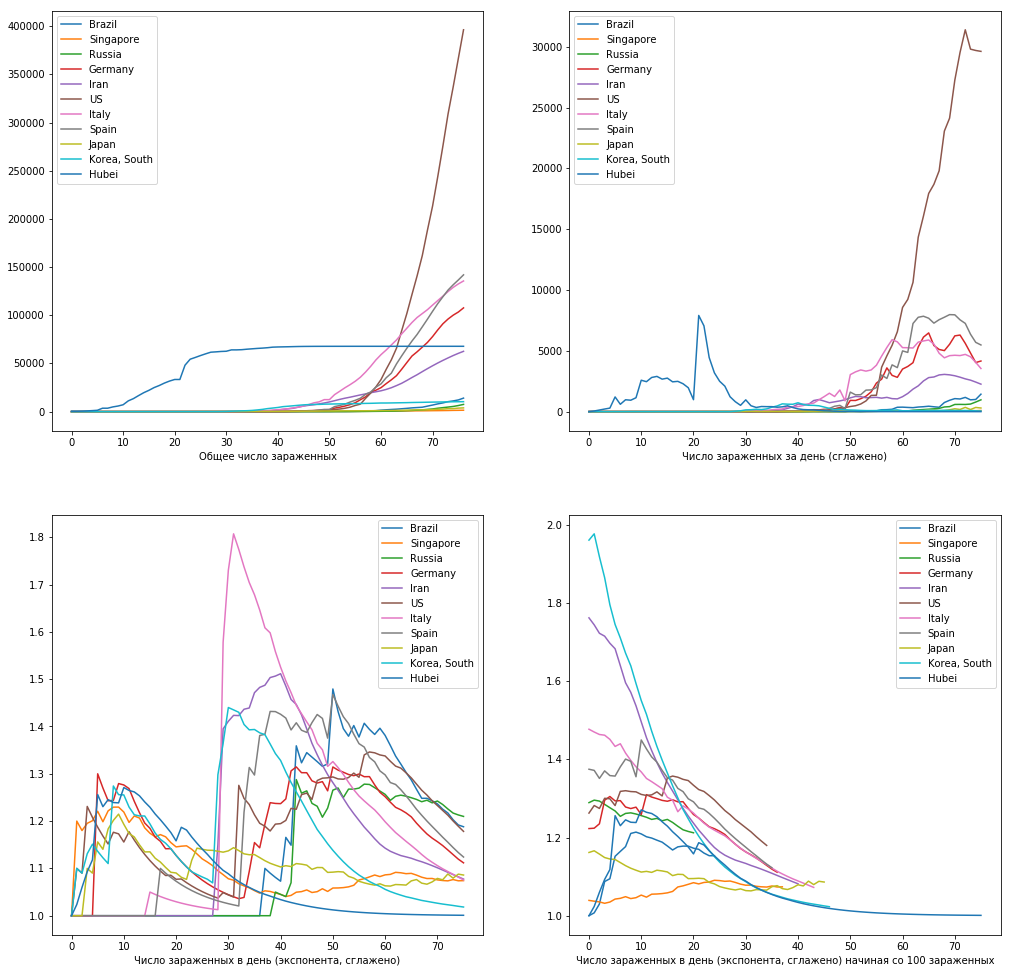

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(17, 17))
ax[0, 0].set_xlabel("Общее число зараженных")
for country, cases in confirmed.items():
    ax[0, 0].plot(range(0, len(cases)), cases, label=country)
ax[0, 0].legend()

ax[0, 1].set_xlabel("Число зараженных за день (cглажено)")
for country, cases in confirmed.items():
    ax[0, 1].plot(range(0, len(cases) - 1), exp_smoothing(cases[1:] - cases[:-1], alpha=0.5), label=country)
ax[0, 1].legend()

ax[1, 0].set_xlabel("Число зараженных в день (экспонента, сглажено)")
for country, cases in confirmed.items():
    ax[1, 0].plot(range(0, len(cases) - 1), exp_smoothing(division_smoothed(cases), alpha=0.9), label=country)
ax[1, 0].legend()

ax[1, 1].set_xlabel("Число зараженных в день (экспонента, сглажено) начиная со 100 зараженных")
for country, cases in confirmed.items():
    cases = cases[cases.searchsorted(100):]
    ax[1, 1].plot(range(0, len(cases) - 1), exp_smoothing(cases[1:] / (cases[:-1]), alpha=0.9), label=country)
ax[1, 1].legend()

fig.savefig("covid19.png")
plt.show()

In [44]:
import scipy as sc
import scipy.optimize
from math import exp

In [71]:
def logistic_function(x, a, b, x0):
    #print(x, a, b, x0)
    return a / (1.0 + np.exp(-b * (x - x0)))

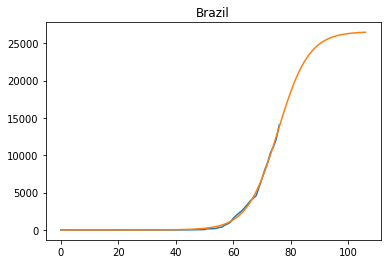

D:\Programming\anaconda\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


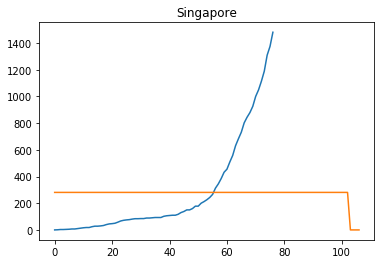

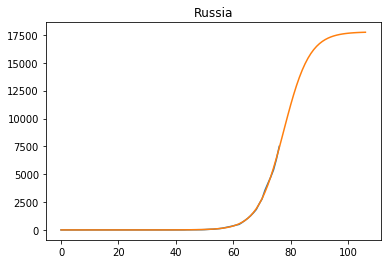

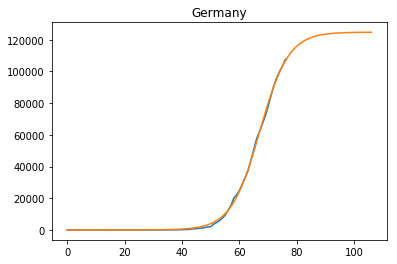

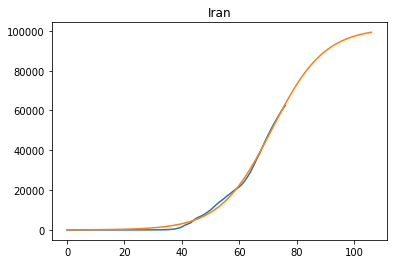

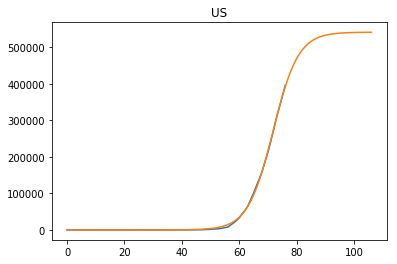

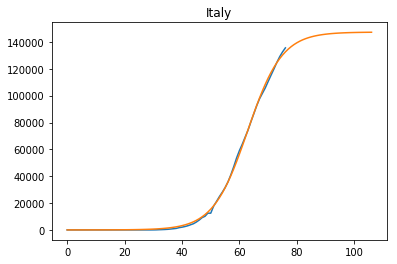

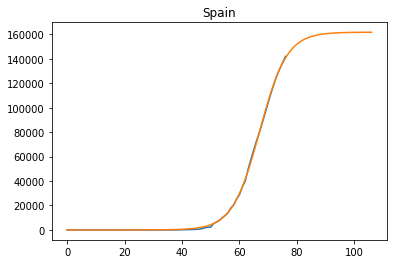

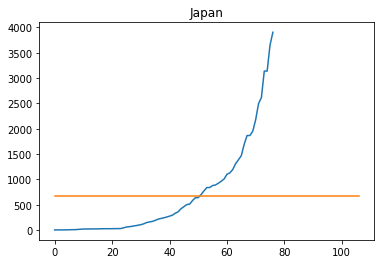

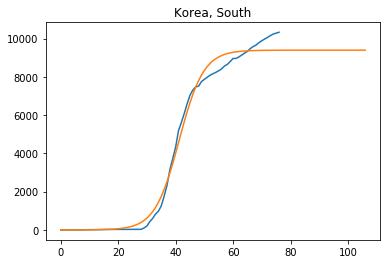

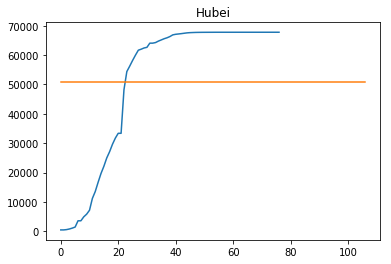

US: 541629.2716959185
Spain: 161792.7529889577
Italy: 147336.34945527886
Germany: 124765.43863918296
Iran: 101530.31082208813
Hubei: 50804.03897087564
Brazil: 26572.593375332697
Russia: 17775.54667735693
Korea, South: 9394.310556742148
Japan: 669.6103835029746
Singapore: 281.0519464872843


In [81]:
expected_upper_bound = dict()

for country, cases in confirmed.items():
    x = list(range(len(cases)))
    x_extended = list(range(len(cases) + 30))
    y = cases
    params, pcov = sc.optimize.curve_fit(logistic_function, np.array(x), np.array(y))
    expected_upper_bound[country] = params[0]
    
    plt.plot(x, y, label="actual")
    plt.plot(x_extended, [logistic_function(xi, params[0], params[1], params[2]) for xi in x_extended], label="predicted")
    plt.title(country)
    plt.show()
        
for country, upper_bound in sorted(expected_upper_bound.items(), key=lambda x: -x[1]):
    print(f"{country}: {upper_bound}")

In [54]:
sc.optimize.curve_fit?